## Name : Dyuti Dasmahapatra
## Section : CSE 1
## Enrollment no. : 210424

In [ ]:
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '20px'
      rule.style.color = 'black'
      break
    }
  }
  '''))
increase_font()
get_ipython().events.register('pre_run_cell', increase_font)
print("Hello in ")
print("...in larger font ")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Hello in 
...in larger font 


#Assignment : Pima Indian Diabetes Dataset


##Objective :
###To diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

##Content:
###The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.metrics import classification_report
import io
from google.colab import files
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from PIL import Image
import scipy.stats as stats


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#upload dataset
uploaded = files.upload()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving diabetes.csv to diabetes (5).csv


In [ ]:
# importing dataset as diabetes
diabetes = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Data Understanding

In [ ]:
#Read Pima Indian Diabetes Dataset from kaggle
diabetes.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
# Show the shape of the dataset
print(f'Dimension of Diabetes dataframe {diabetes.shape[0]} rows, {diabetes.shape[1]} columns')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Dimension of Diabetes dataframe 768 rows, 9 columns


###We can observe that the data set contain 768 rows and 9 columns.

In [ ]:
diabetes.groupby('Outcome').size()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Outcome
0    500
1    268
dtype: int64

###‘Outcome’ is the column which we are going to predict, which says if the patient is diabetic or not. 1 means the person is diabetic and 0 means a person is not. We can identify that out of the 768 persons, 500 are labeled as 0 (non-diabetic) and 268 as 1 (diabetic)

In [ ]:
print('The columns / features of the Diabetes Dataset')
for col in diabetes.columns:
    print(col)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The columns / features of the Diabetes Dataset
Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [ ]:
#Show the name of the columns, explain if possible in some detail

column_explanations = {
    'Pregnancies': 'Number of times pregnant',
    'Glucose': 'Plasma glucose concentration in 2 hours',
    'BloodPressure': 'Diastolic blood pressure (mm Hg)',
    'SkinThickness': 'Triceps skinfold thickness (mm)',
    'Insulin': '2-Hour serum insulin (mu U/ml)',
    'BMI': 'Body mass index (weight in kg/(height in m)^2)',
    'DiabetesPedigreeFunction': 'Diabetes pedigree function',
    'Age': 'Age in years',
    'Outcome': 'Class variable (0: non-diabetic, 1: diabetic)'
}


columns = diabetes.columns.tolist()
column_data = []
for column in columns:
    column_data.append([column, column_explanations.get(column, '')])


print('Column names and their explanations')
print(tabulate(column_data, headers=['Column Name', 'Explanation'], tablefmt='grid'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Column names and their explanations
+--------------------------+------------------------------------------------+
| Column Name              | Explanation                                    |
+==========================+================================================+
| Pregnancies              | Number of times pregnant                       |
+--------------------------+------------------------------------------------+
| Glucose                  | Plasma glucose concentration in 2 hours        |
+--------------------------+------------------------------------------------+
| BloodPressure            | Diastolic blood pressure (mm Hg)               |
+--------------------------+------------------------------------------------+
| SkinThickness            | Triceps skinfold thickness (mm)                |
+--------------------------+------------------------------------------------+
| Insulin                  | 2-Hour serum insulin (mu U/ml)                 |
+--------------------------+

In [ ]:
#Display dataframe in a useful column order for decision makers

new_column_order = ['Outcome','Age', 'BMI', 'BloodPressure', 'Glucose', 'Insulin','Pregnancies', 'SkinThickness', 'DiabetesPedigreeFunction' ]
diabetes = diabetes.loc[:, new_column_order]

print('The columns / features of the Diabetes Dataset after rearranging in a useful order')
for col in diabetes.columns:
    print(col)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The columns / features of the Diabetes Dataset after rearranging in a useful order
Outcome
Age
BMI
BloodPressure
Glucose
Insulin
Pregnancies
SkinThickness
DiabetesPedigreeFunction


In [ ]:
print("Basic summary of dataset:")
diabetes.describe()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Basic summary of dataset:


Outcome         Age         BMI  BloodPressure     Glucose  \
count  768.000000  768.000000  768.000000     768.000000  768.000000   
mean     0.348958   33.240885   31.992578      69.105469  120.894531   
std      0.476951   11.760232    7.884160      19.355807   31.972618   
min      0.000000   21.000000    0.000000       0.000000    0.000000   
25%      0.000000   24.000000   27.300000      62.000000   99.000000   
50%      0.000000   29.000000   32.000000      72.000000  117.000000   
75%      1.000000   41.000000   36.600000      80.000000  140.250000   
max      1.000000   81.000000   67.100000     122.000000  199.000000   

          Insulin  Pregnancies  SkinThickness  DiabetesPedigreeFunction  
count  768.000000   768.000000     768.000000                768.000000  
mean    79.799479     3.845052      20.536458                  0.471876  
std    115.244002     3.369578      15.952218                  0.331329  
min      0.000000     0.000000       0.000000                  0.078000  
25%      0.000000     1.000000       0.000000                  0.243750  
50%     30.500000     3.000000      23.000000                  0.372500  
75%    127.250000     6.000000      32.000000                  0.626250  
max    846.000000    17.000000      99.000000                  2.420000

In [ ]:
diabetes.info()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Outcome                   768 non-null    int64  
 1   Age                       768 non-null    int64  
 2   BMI                       768 non-null    float64
 3   BloodPressure             768 non-null    int64  
 4   Glucose                   768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   Pregnancies               768 non-null    int64  
 7   SkinThickness             768 non-null    int64  
 8   DiabetesPedigreeFunction  768 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Histogram of Different Features with respect to Outcome


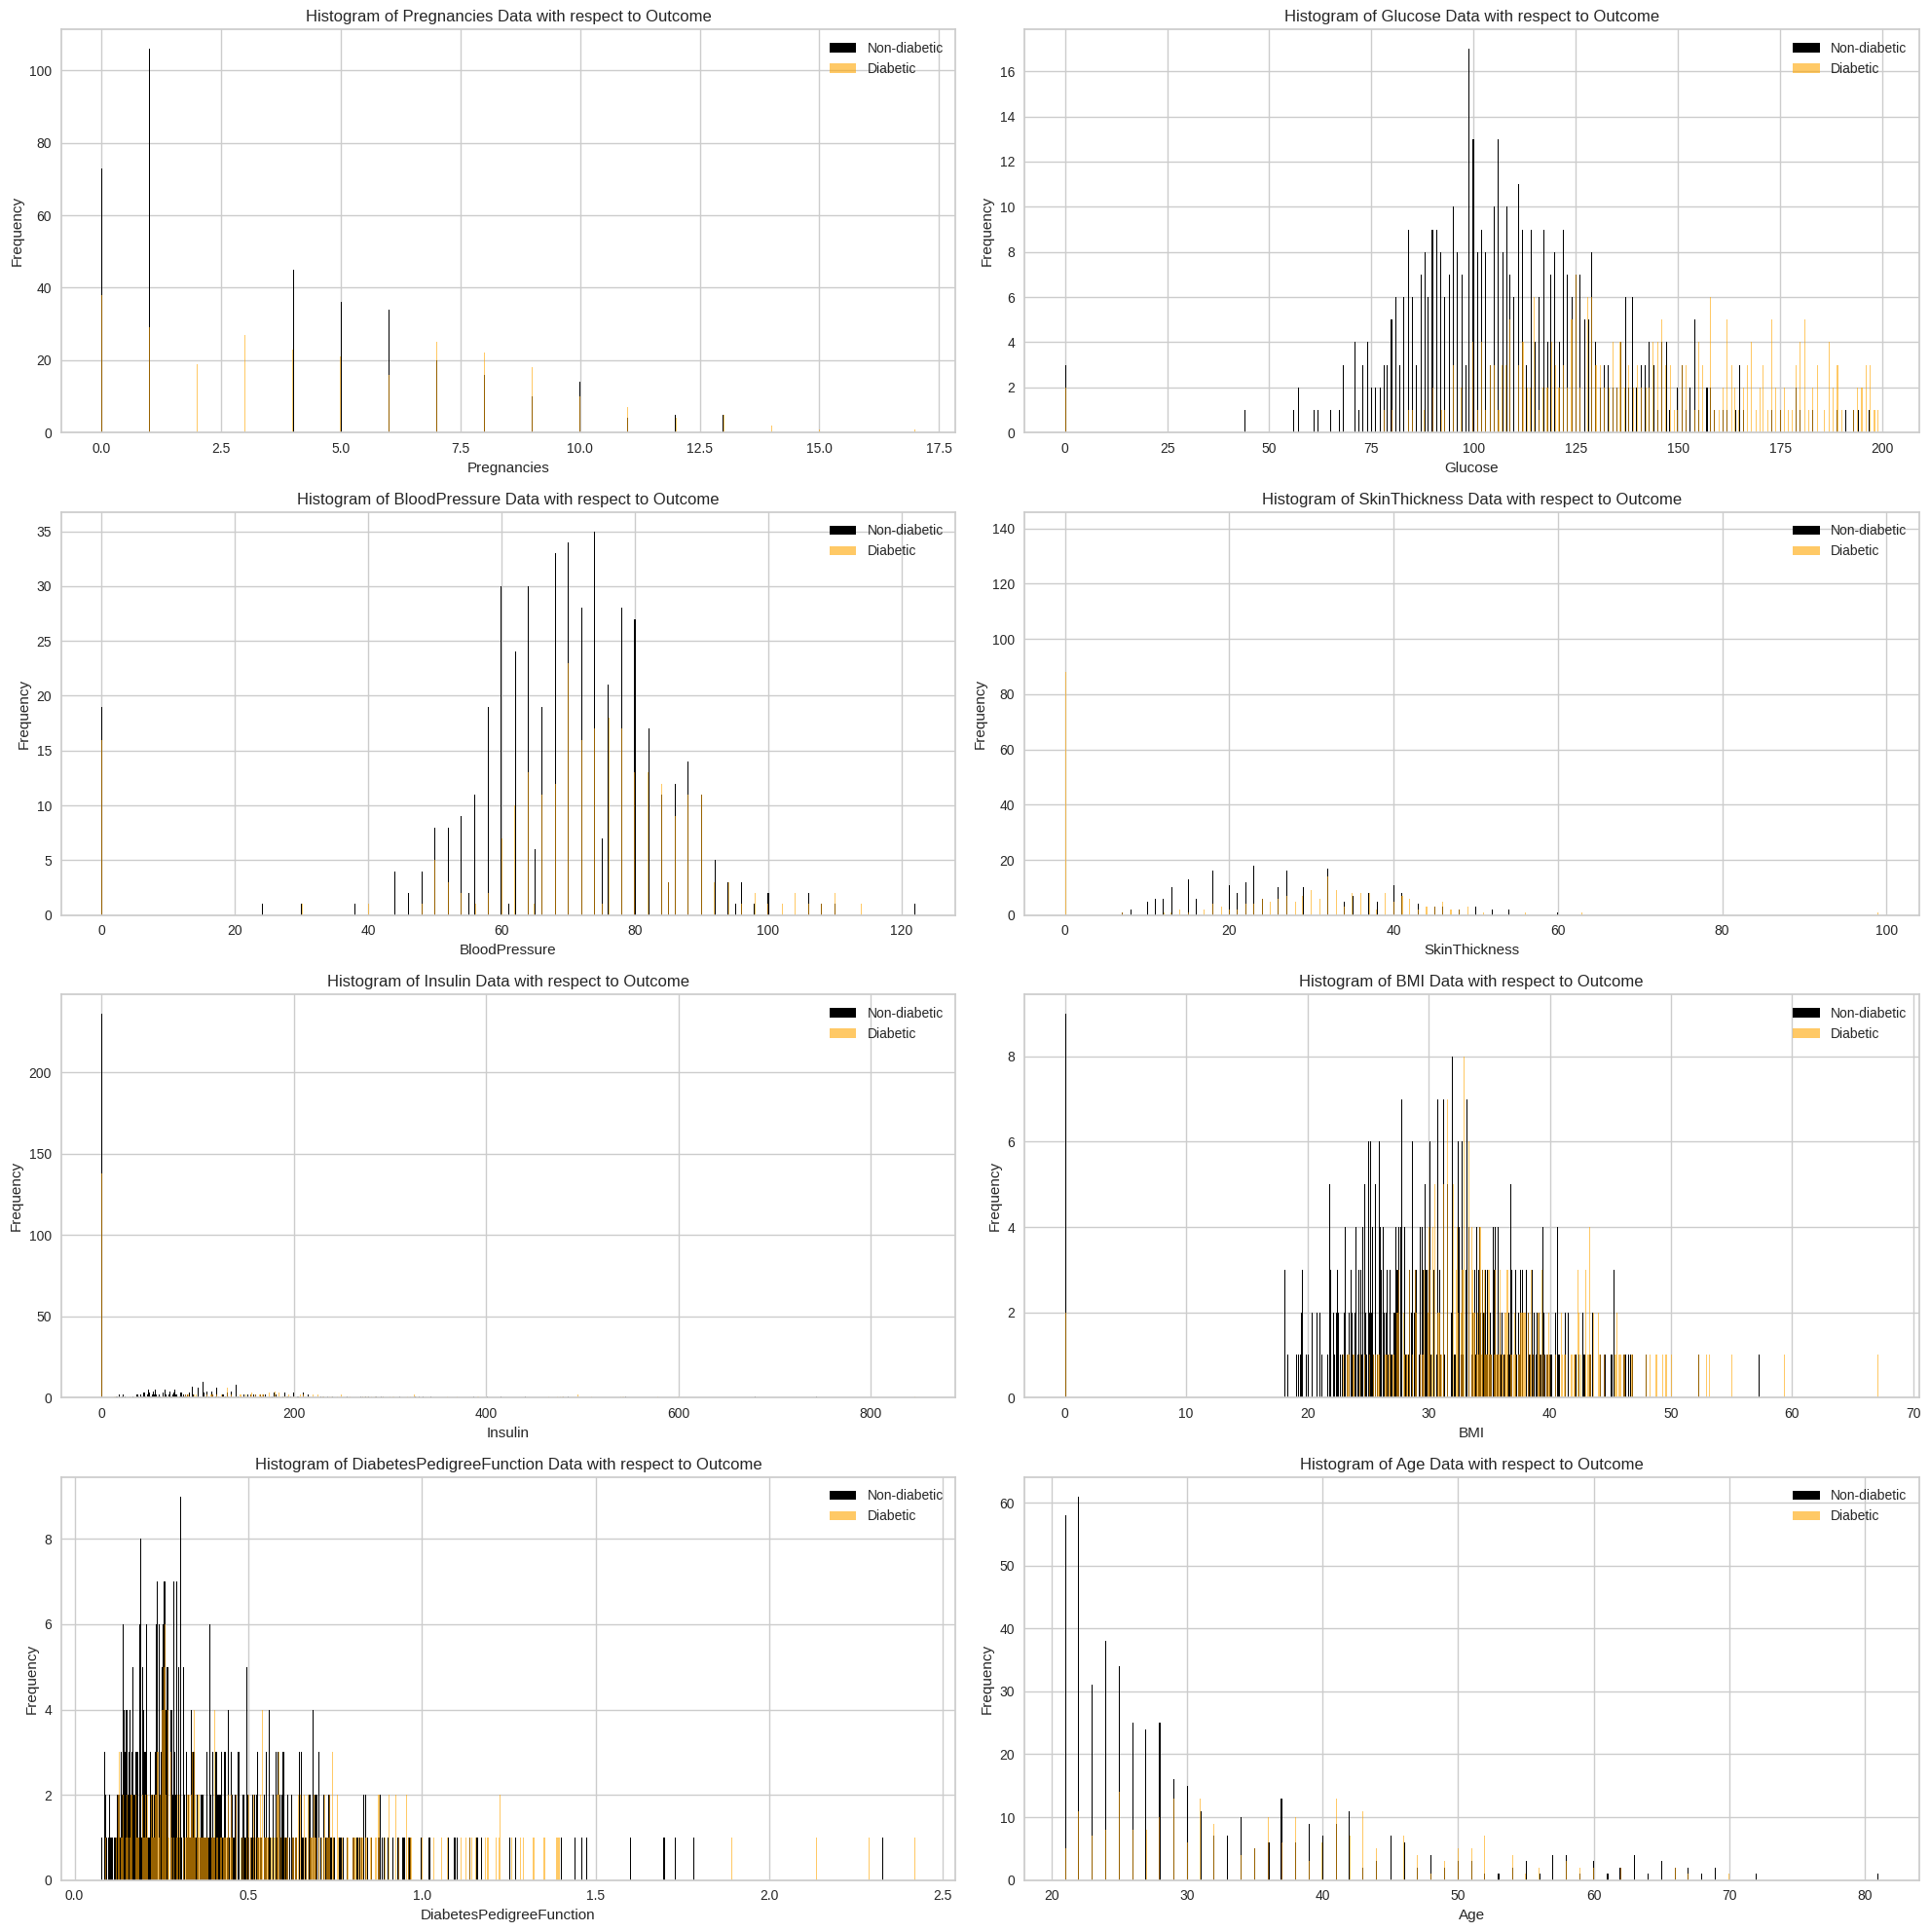

In [ ]:
# Histogram of Different Features with respect to Outcome
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

rows = 4
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

axes = axes.flatten()

for i, col in enumerate(columns):
    axes[i].hist(diabetes[diabetes['Outcome'] == 0][col], bins=768, alpha=1, label='Non-diabetic', linewidth=2, color='black')
    axes[i].hist(diabetes[diabetes['Outcome'] == 1][col], bins=768, alpha=0.6, label='Diabetic', color='orange')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title('Histogram of ' + col + ' Data with respect to Outcome')
    axes[i].legend()

print('Histogram of Different Features with respect to Outcome')
for i in range(len(columns), rows*cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()



###Based on the histogram analysis, it appears that there are a significant number of zero values. This may not be beneficial for the model's performance, as it is not capturing any meaningful information. Therefore, it would be advisable to consider removing these zero values from the dataset in order to improve the model's accuracy and effectiveness.

## Data Pre-processing

In [ ]:
# Remove any null values
diabetes.isnull().sum()
diabetes.isna().sum()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Outcome                     0
Age                         0
BMI                         0
BloodPressure               0
Glucose                     0
Insulin                     0
Pregnancies                 0
SkinThickness               0
DiabetesPedigreeFunction    0
dtype: int64

##Unexpected Outliers

###Determing which features can be 0 and which cannot be
*  Age: Age can typically range from 0 to a maximum value determined by the dataset. However, it's unlikely that age would be exactly zero, as it represents the number of years a person has lived.

* BMI: Should not be 0 or close to zero unless the person is really underweight which could be life-threatening.

* Blood pressure: It is evident that the readings of the data set seem wrong because a living person cannot have a diastolic blood pressure of zero.

* Glucose : Even after fasting glucose levels would not be as low as zero. Therefore zero is an invalid reading.

* Insulin: Insulin is a hormone that regulates blood sugar levels and is typically present in the body. However, in a rare situation a person can have zero insulin but by observing the data                     

* Pregnancies: The number of pregnancies is typically a positive integer, representing the number of times a person has been pregnant. The value of it can range from 0 to positive numbers

* Skin Thickness: For normal people, skin fold thickness can’t be less than 10 mm better yet zero.

* DiabetesPedigreeFunction: The diabetes pedigree function is a calculated value that estimates the likelihood of having diabetes based on family history. It is typically a positive value, but it could potentially be zero if there is no family history of diabetes.









In [ ]:
#removing rows with 0 value:
diabetes = diabetes[(diabetes.BloodPressure != 0) &
                    (diabetes.BMI != 0) &
                    (diabetes.Glucose != 0)&
                    (diabetes.SkinThickness != 0)&
                    (diabetes.Insulin != 0)]

print(f'Dimension of Diabetes dataframe {diabetes.shape[0]} rows, {diabetes.shape[1]} columns')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Dimension of Diabetes dataframe 392 rows, 9 columns


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Histogram of features with respect to Outcome after removing outliers


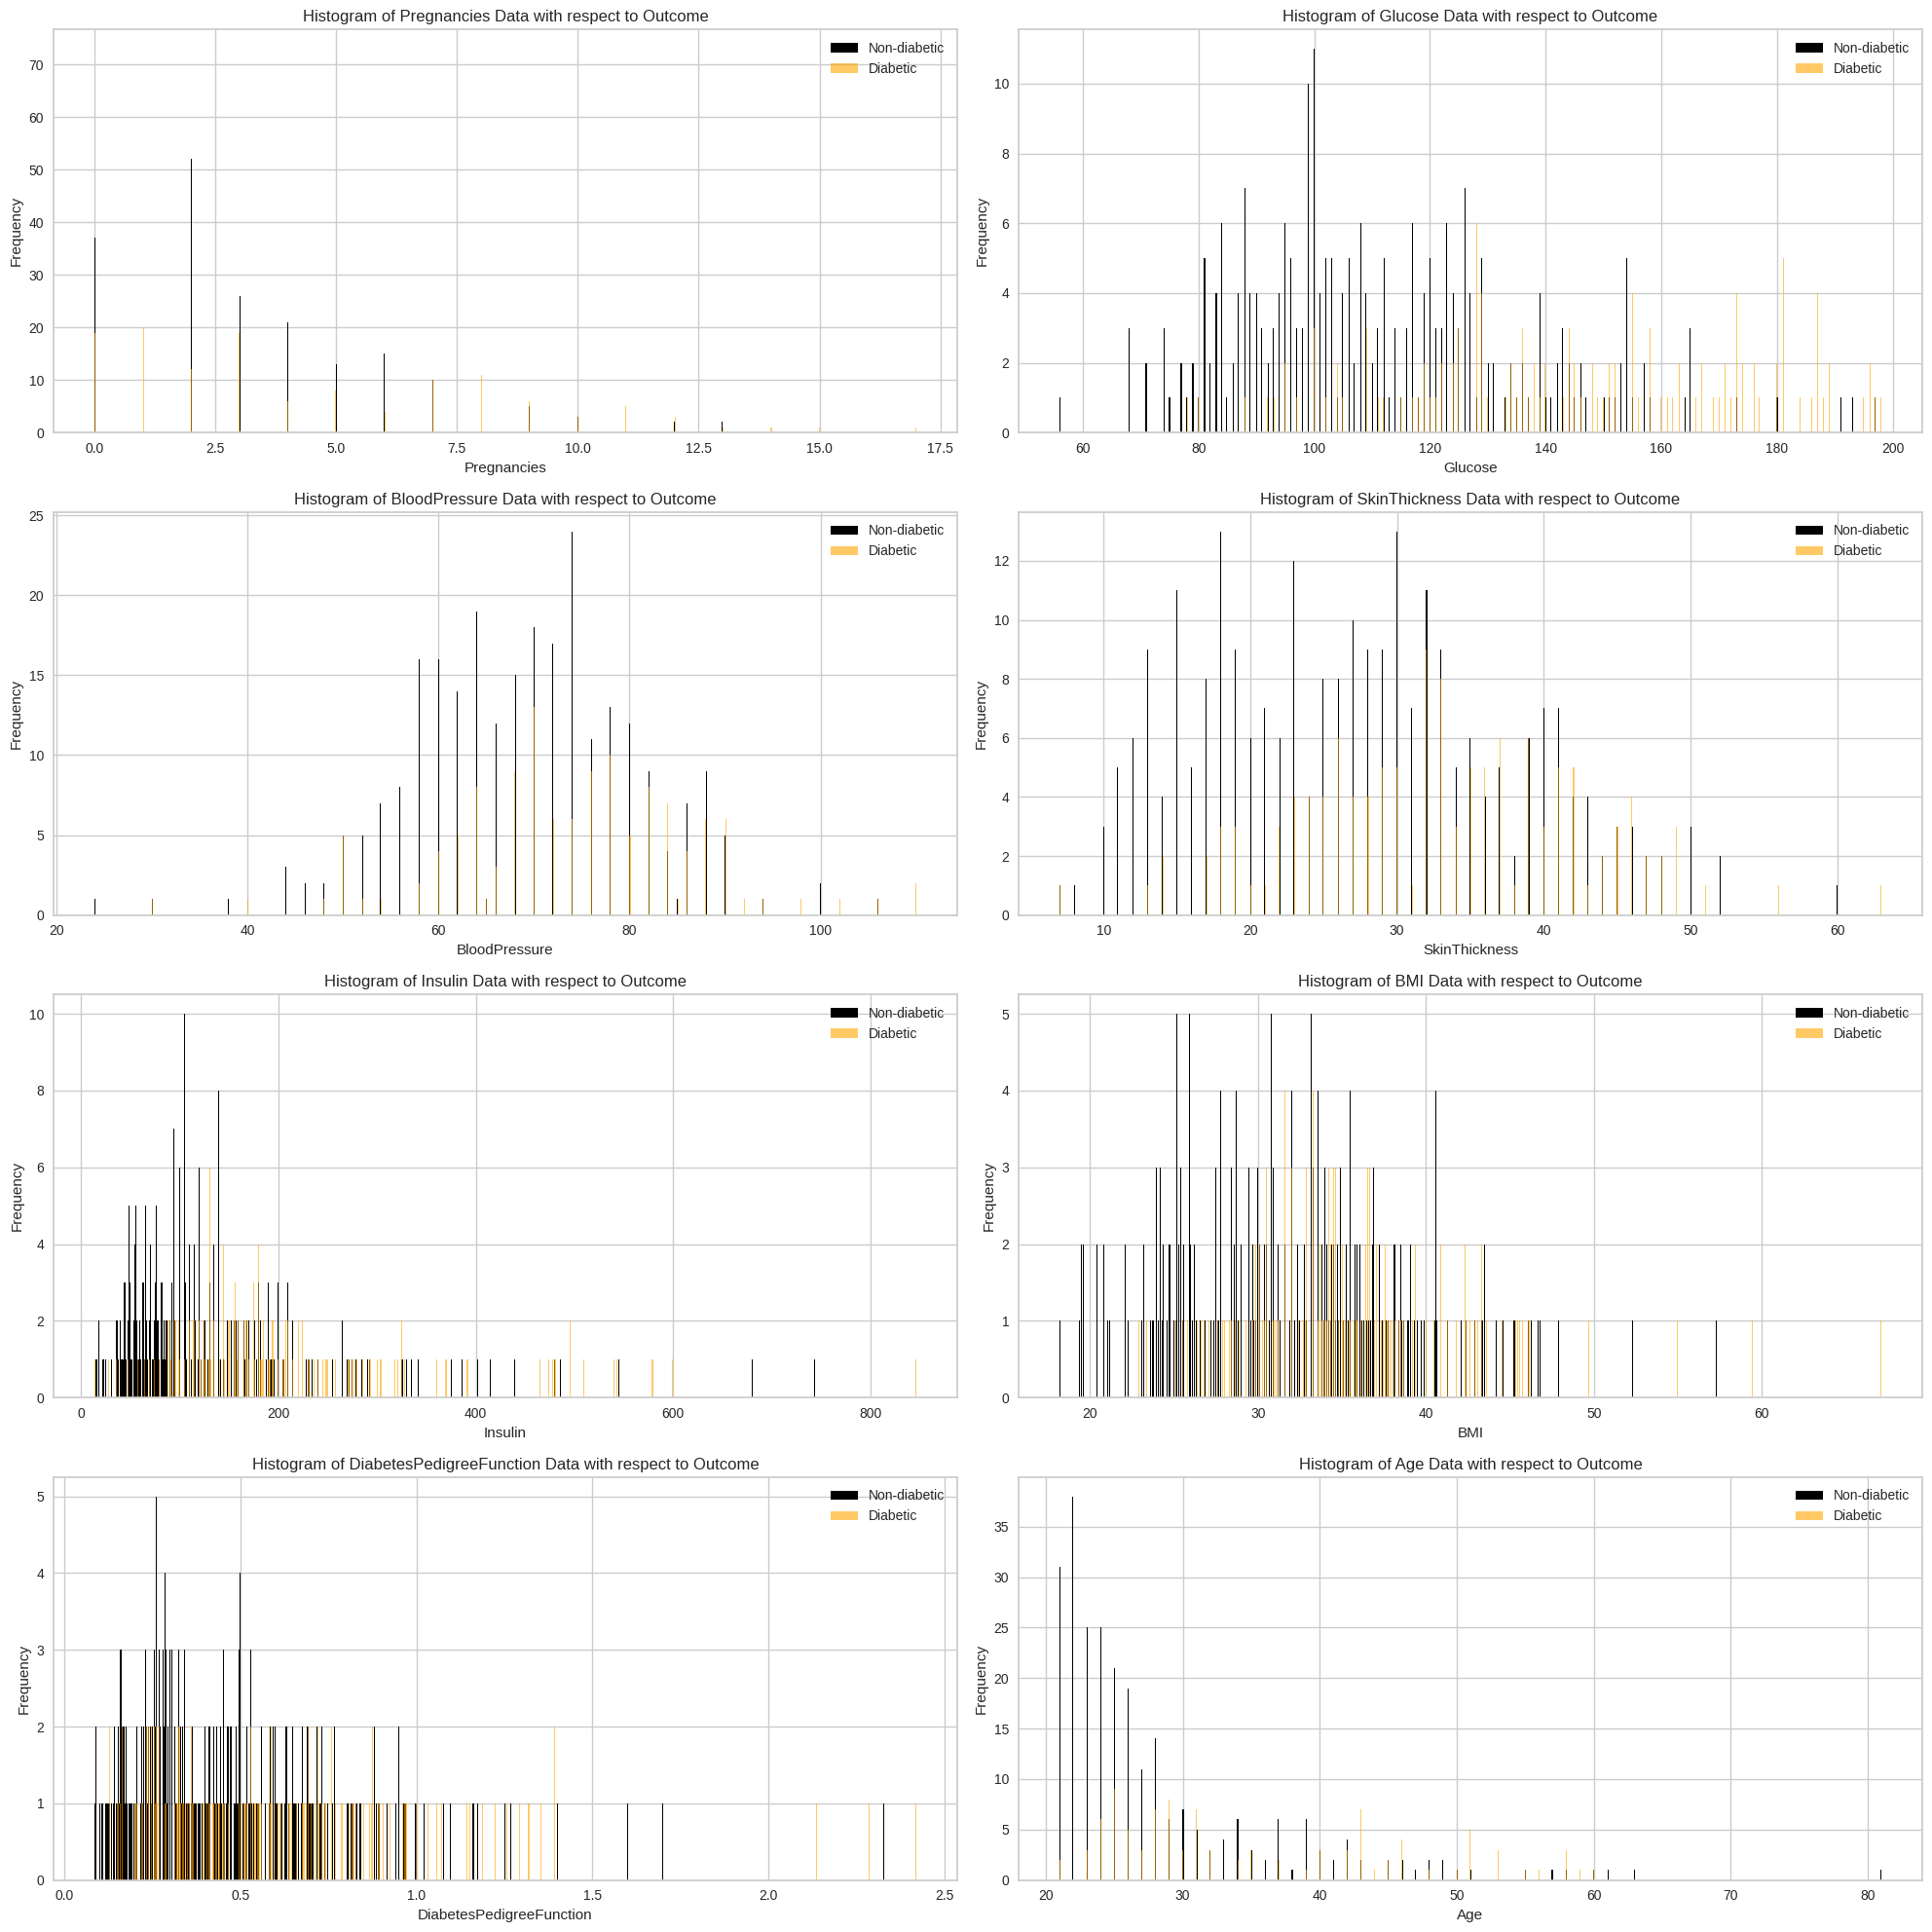

In [ ]:
#Histogram of features with respect to Outcome after removing outliers
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

rows = 4
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

axes = axes.flatten()

for i, col in enumerate(columns):

    axes[i].hist(diabetes[diabetes['Outcome'] == 0][col], bins=768, alpha=1, label='Non-diabetic', linewidth=2, color='black')

    axes[i].hist(diabetes[diabetes['Outcome'] == 1][col], bins=768, alpha=0.6, label='Diabetic', color='orange')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title('Histogram of ' + col + ' Data with respect to Outcome')
    axes[i].legend()

print('Histogram of features with respect to Outcome after removing outliers')
for i in range(len(columns), rows*cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()



###The data looks more cleaned after removing outliers

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

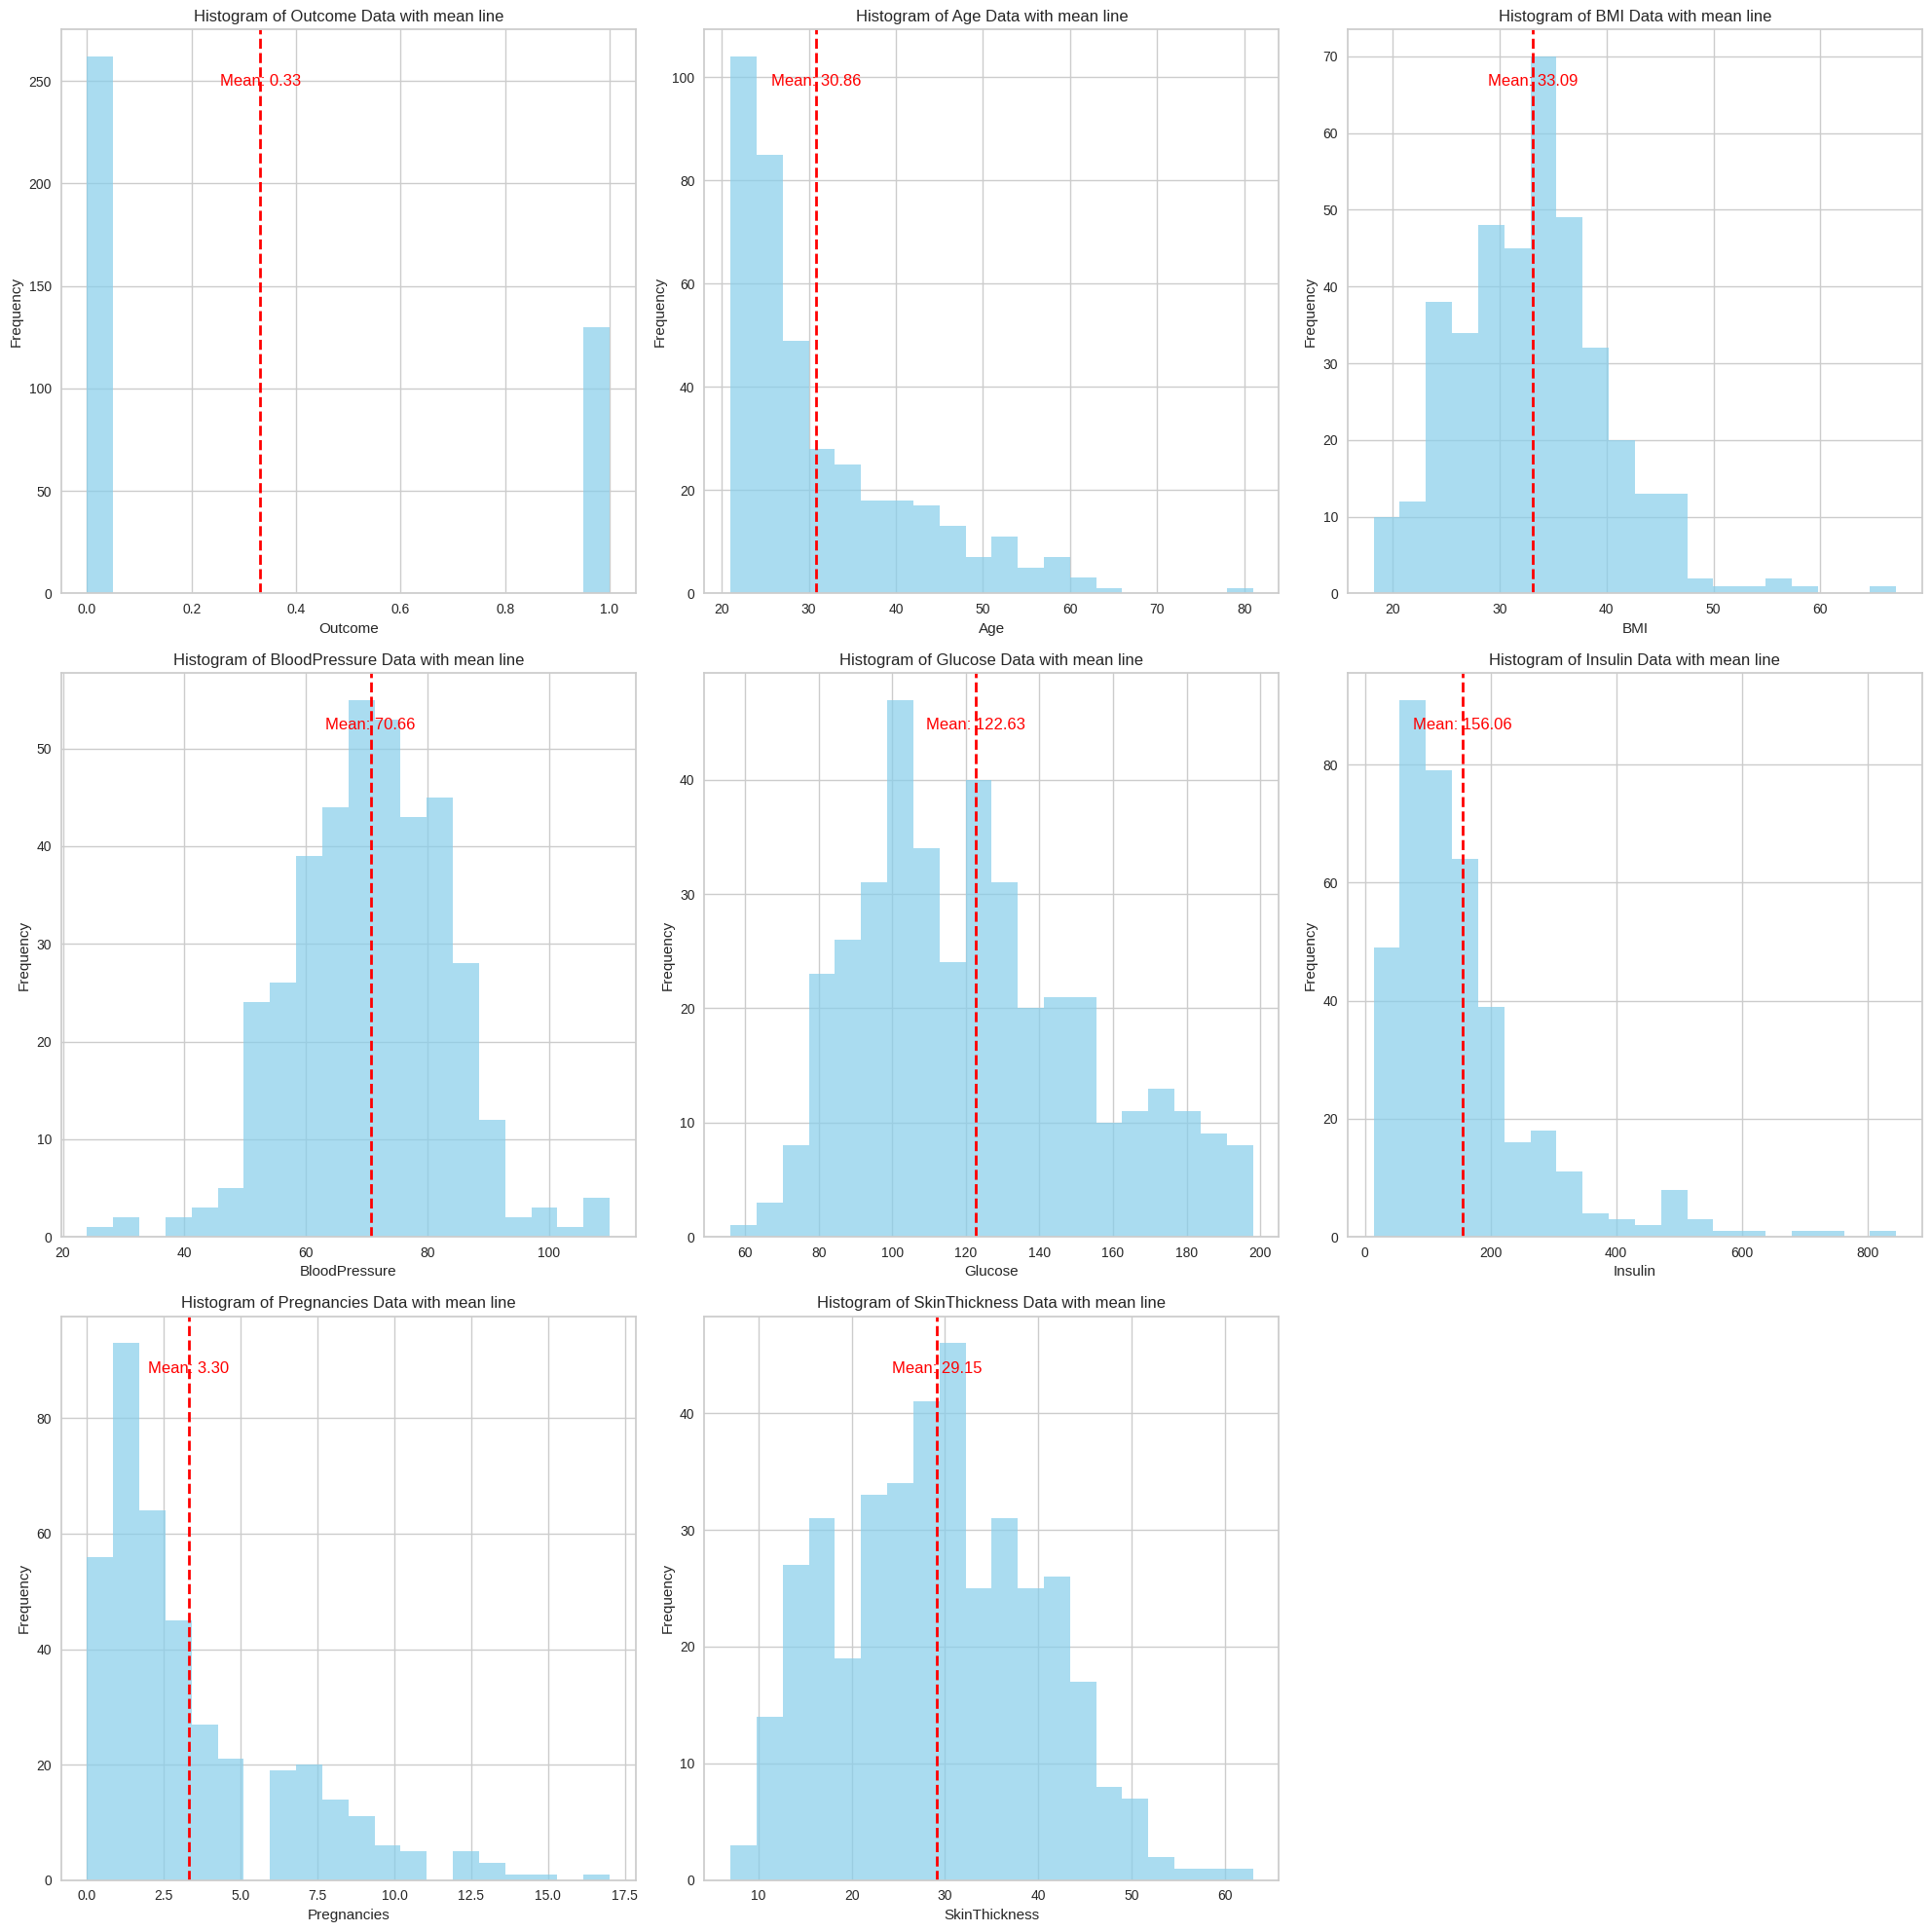

In [ ]:
# Plot histograms with mean line
plt.figure(figsize=(20, 20))
for i, col in enumerate(diabetes.columns[:-1]):
    plt.subplot(3, 3, i+1)
    plt.hist(diabetes[col], bins=20, alpha=0.7, color='skyblue')
    mean_val = diabetes[col].mean()
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)
    plt.text(mean_val, plt.ylim()[1]*0.9, f'Mean: {mean_val:.2f}', color='red', ha='center')
    plt.title('Histogram of ' + col + ' Data with mean line')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
# Skewness of features
skewness = diabetes.skew()
print("Skewness of features:")
print(skewness)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Skewness of features:
Outcome                     0.717990
Age                         1.403607
BMI                         0.663485
BloodPressure              -0.087516
Glucose                     0.517850
Insulin                     2.165116
Pregnancies                 1.335596
SkinThickness               0.209311
DiabetesPedigreeFunction    1.959101
dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

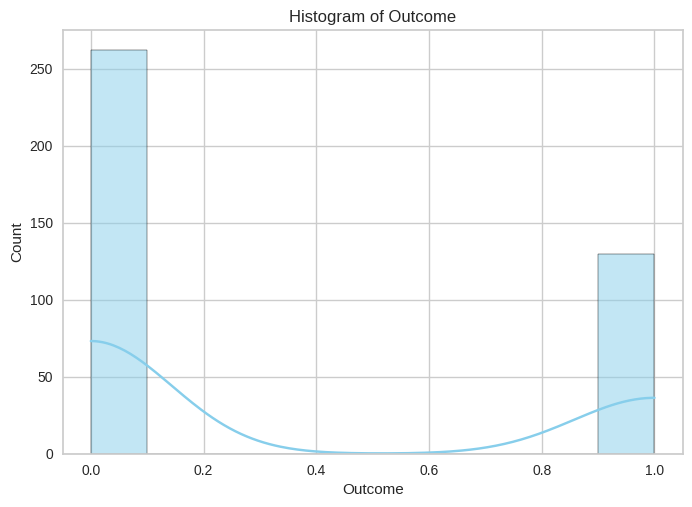

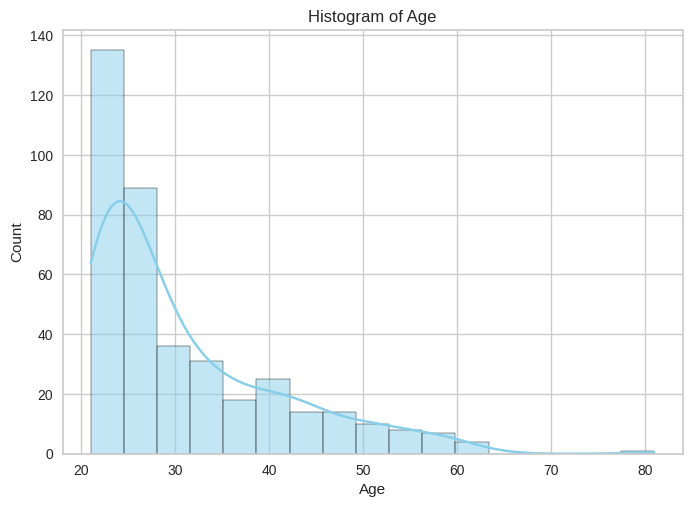

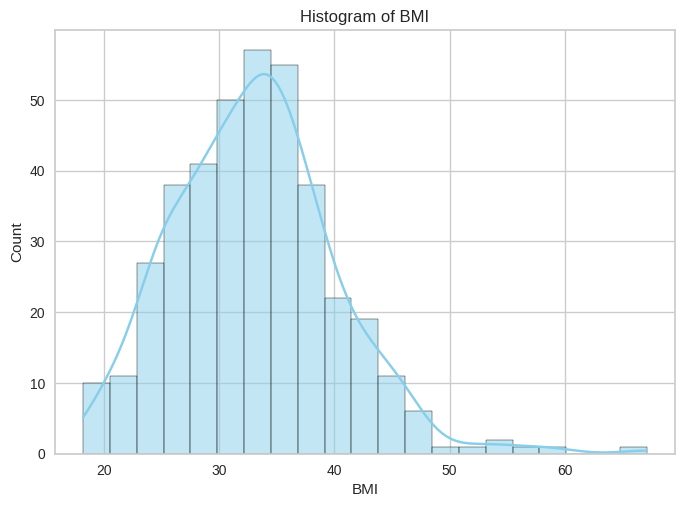

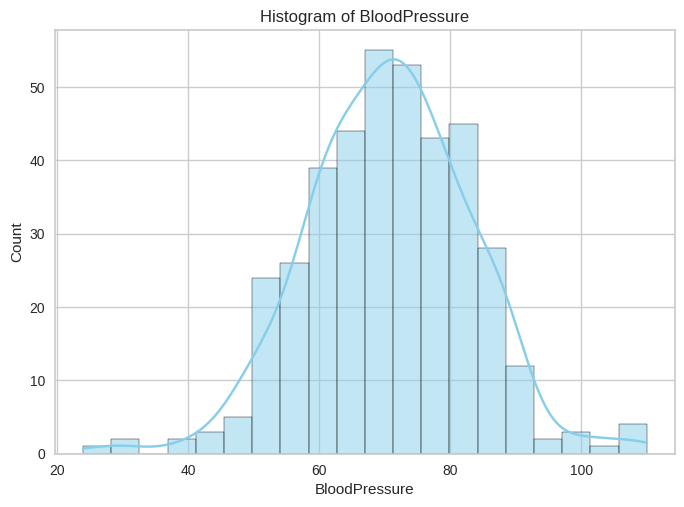

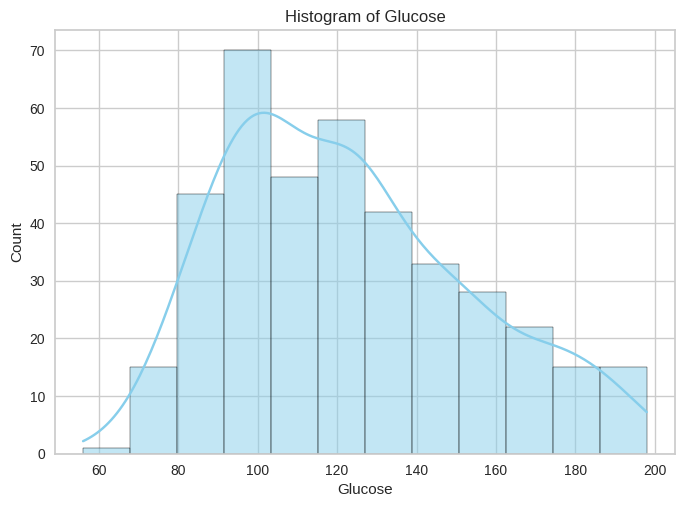

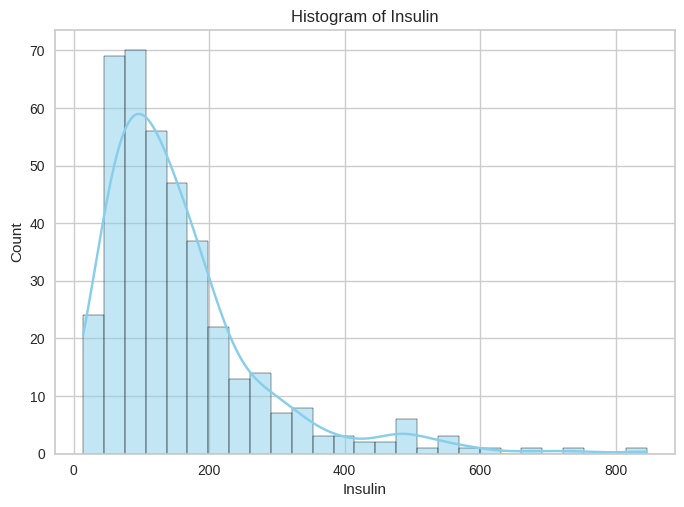

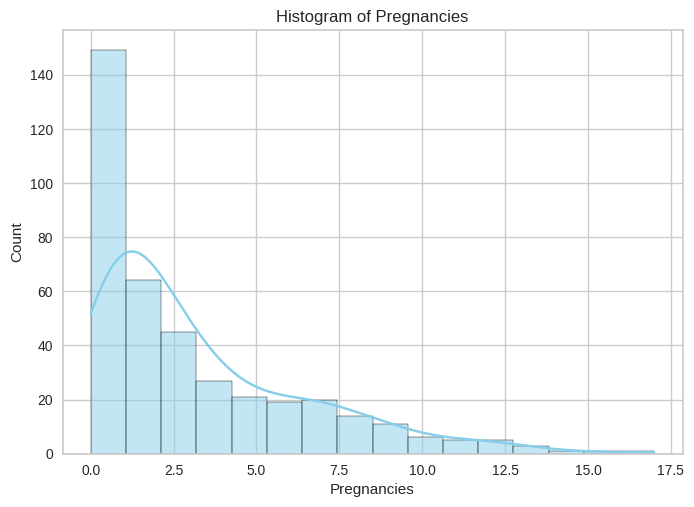

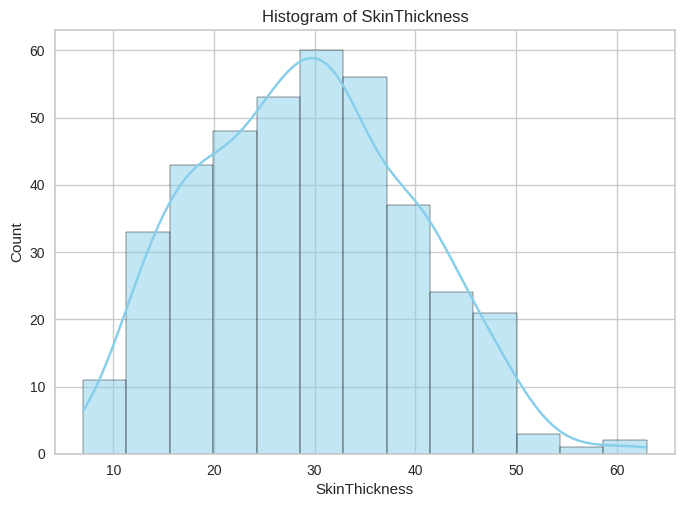

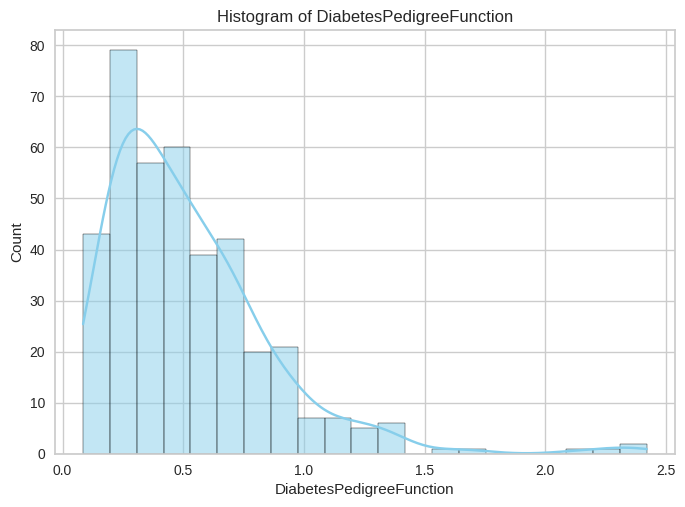

[]


In [ ]:
# Visulatisation of skewness
skewness_array = np.empty((0, 2), dtype=object)

for col in diabetes.columns:
    col_skewness = stats.skew(diabetes[col])


    plt.figure()
    sns.histplot(diabetes[col], kde=True, color='skyblue')
    plt.title("Histogram of {}".format(col))
    plt.show()

print(skewness_array)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

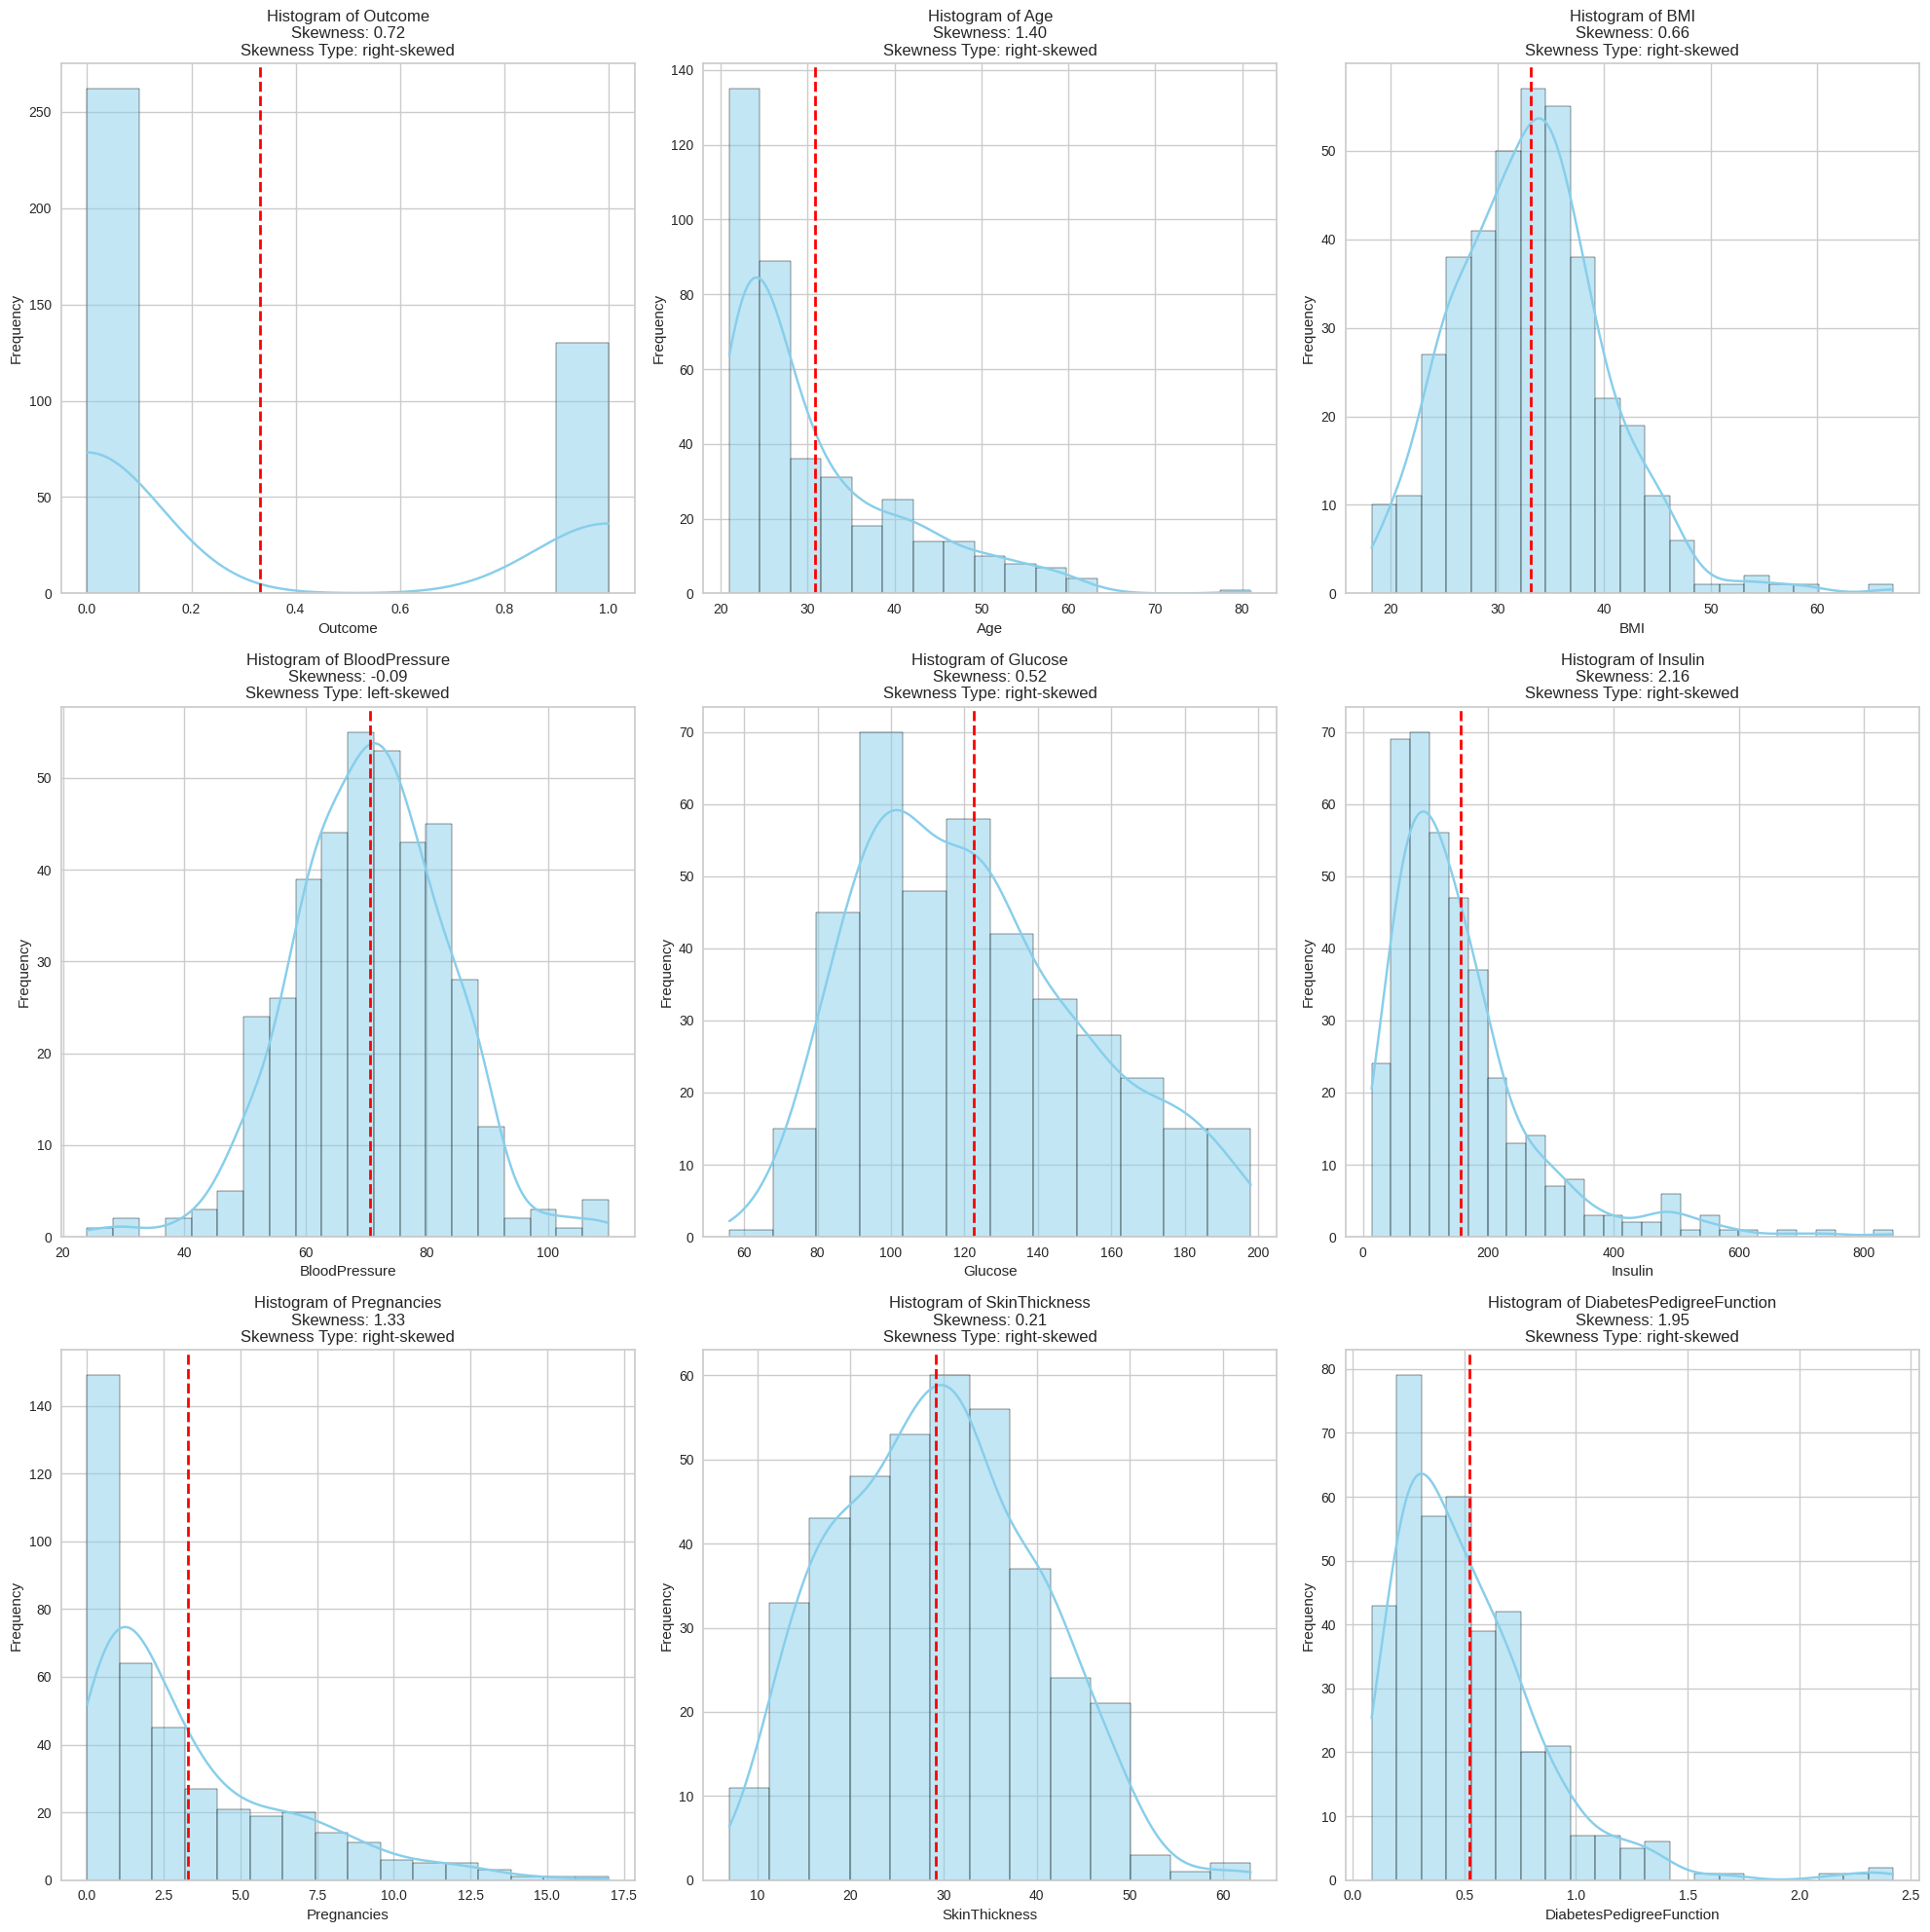

In [ ]:

n_cols = 3
n_rows = int(np.ceil(len(diabetes.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.ravel()

for i, col in enumerate(diabetes.columns):
    col_skewness = stats.skew(diabetes[col])

    if col_skewness > 0:
        skewness_type = 'right-skewed'
    elif col_skewness < 0:
        skewness_type = 'left-skewed'
    else:
        skewness_type = 'approximately symmetric'

    sns.histplot(diabetes[col], kde=True, color='skyblue', ax=axes[i])
    axes[i].axvline(diabetes[col].mean(), color='red', linestyle='dashed', linewidth=2)

    axes[i].set_title("Histogram of {}\nSkewness: {:.2f}\nSkewness Type: {}".format(col, col_skewness, skewness_type))
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(len(diabetes.columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


## Three patterns or inferences observed visually and backed by skewness statistics

### 1. BloodPressure and SkinThickness histograms are approximately normally distributed as the mean line is close to the peak of the distribution. Skewness statistics SkinThickness and BloodPressure are also close to 0, indicating minimal skewness.

### 2. Outcome, Insulin, Pregnancies, DiabetesPedigreeFunction and Age histograms are right-skewed as the mean line is towards the lower end of the distribution. Skewness statistics for these features are positive, indicating right skewness.

### 3. BMI & Glucose are slightly positively skewed as the mean line is slightly towards the lower end of the distribution. Skewness statistics for these features are also slightly positive, indicating minimal right skewness.


#Handling skewness

###Applying square root transformation to the features with positive skewness can potentially reduce the skewness and make the data more symmetric.

### However, it's important to note that this transformation can also affect the correlation between the features and the outcome variable. Therefore we will select the features that have the least correlation with the outcome variable

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

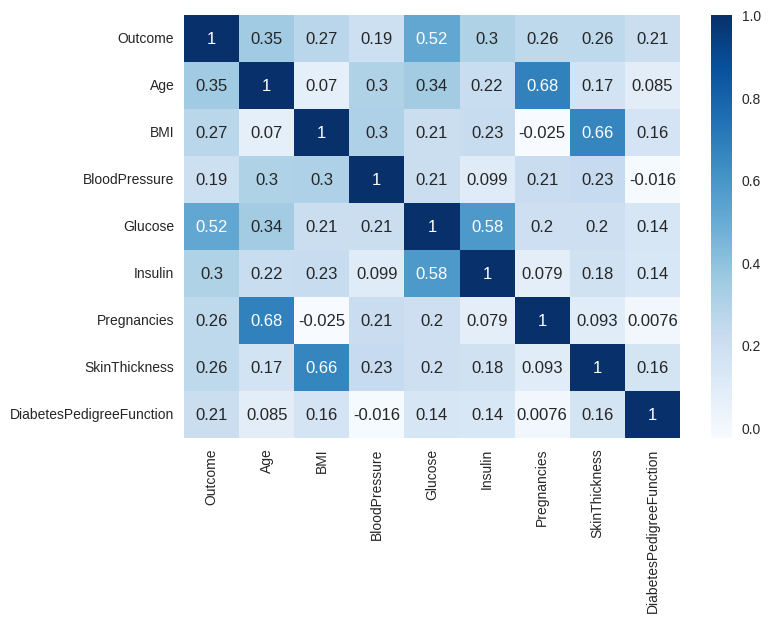

In [ ]:
# heatmap to find co-relation between features
cmap = sns.color_palette("Blues", as_cmap=True)
sns.heatmap(diabetes.corr(), annot=True, cmap=cmap)

plt.show()

In [ ]:
# performing square root operation
diabetes['DiabetesPedigreeFunction'] = np.sqrt(diabetes['DiabetesPedigreeFunction'])
diabetes['BMI'] = np.sqrt(diabetes['BMI'])
diabetes['Pregnancies'] = np.sqrt(diabetes['Pregnancies'])
diabetes['Insulin'] = np.sqrt(diabetes['Insulin'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## compare from before
skewness_new = diabetes.skew()
skewness = diabetes.skew()

diabetes_squared = diabetes ** 2
skewness_new = diabetes_squared.skew()
skewness_df = pd.concat([skewness, skewness_new], axis=1)
skewness_df.columns = ['Original Skewness', 'New Skewness']

print(skewness_df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                          Original Skewness  New Skewness
Outcome                            0.717990      0.717990
Age                                1.403607      2.252068
BMI                                0.257217      0.663485
BloodPressure                     -0.087516      0.623767
Glucose                            0.517850      0.953455
Insulin                            1.016695      2.165116
Pregnancies                        0.112057      1.335596
SkinThickness                      0.209311      1.024901
DiabetesPedigreeFunction           0.805190      1.959101


##We can see that after applying sqaure root transformation, the skewness of the selected feautes have reduced.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

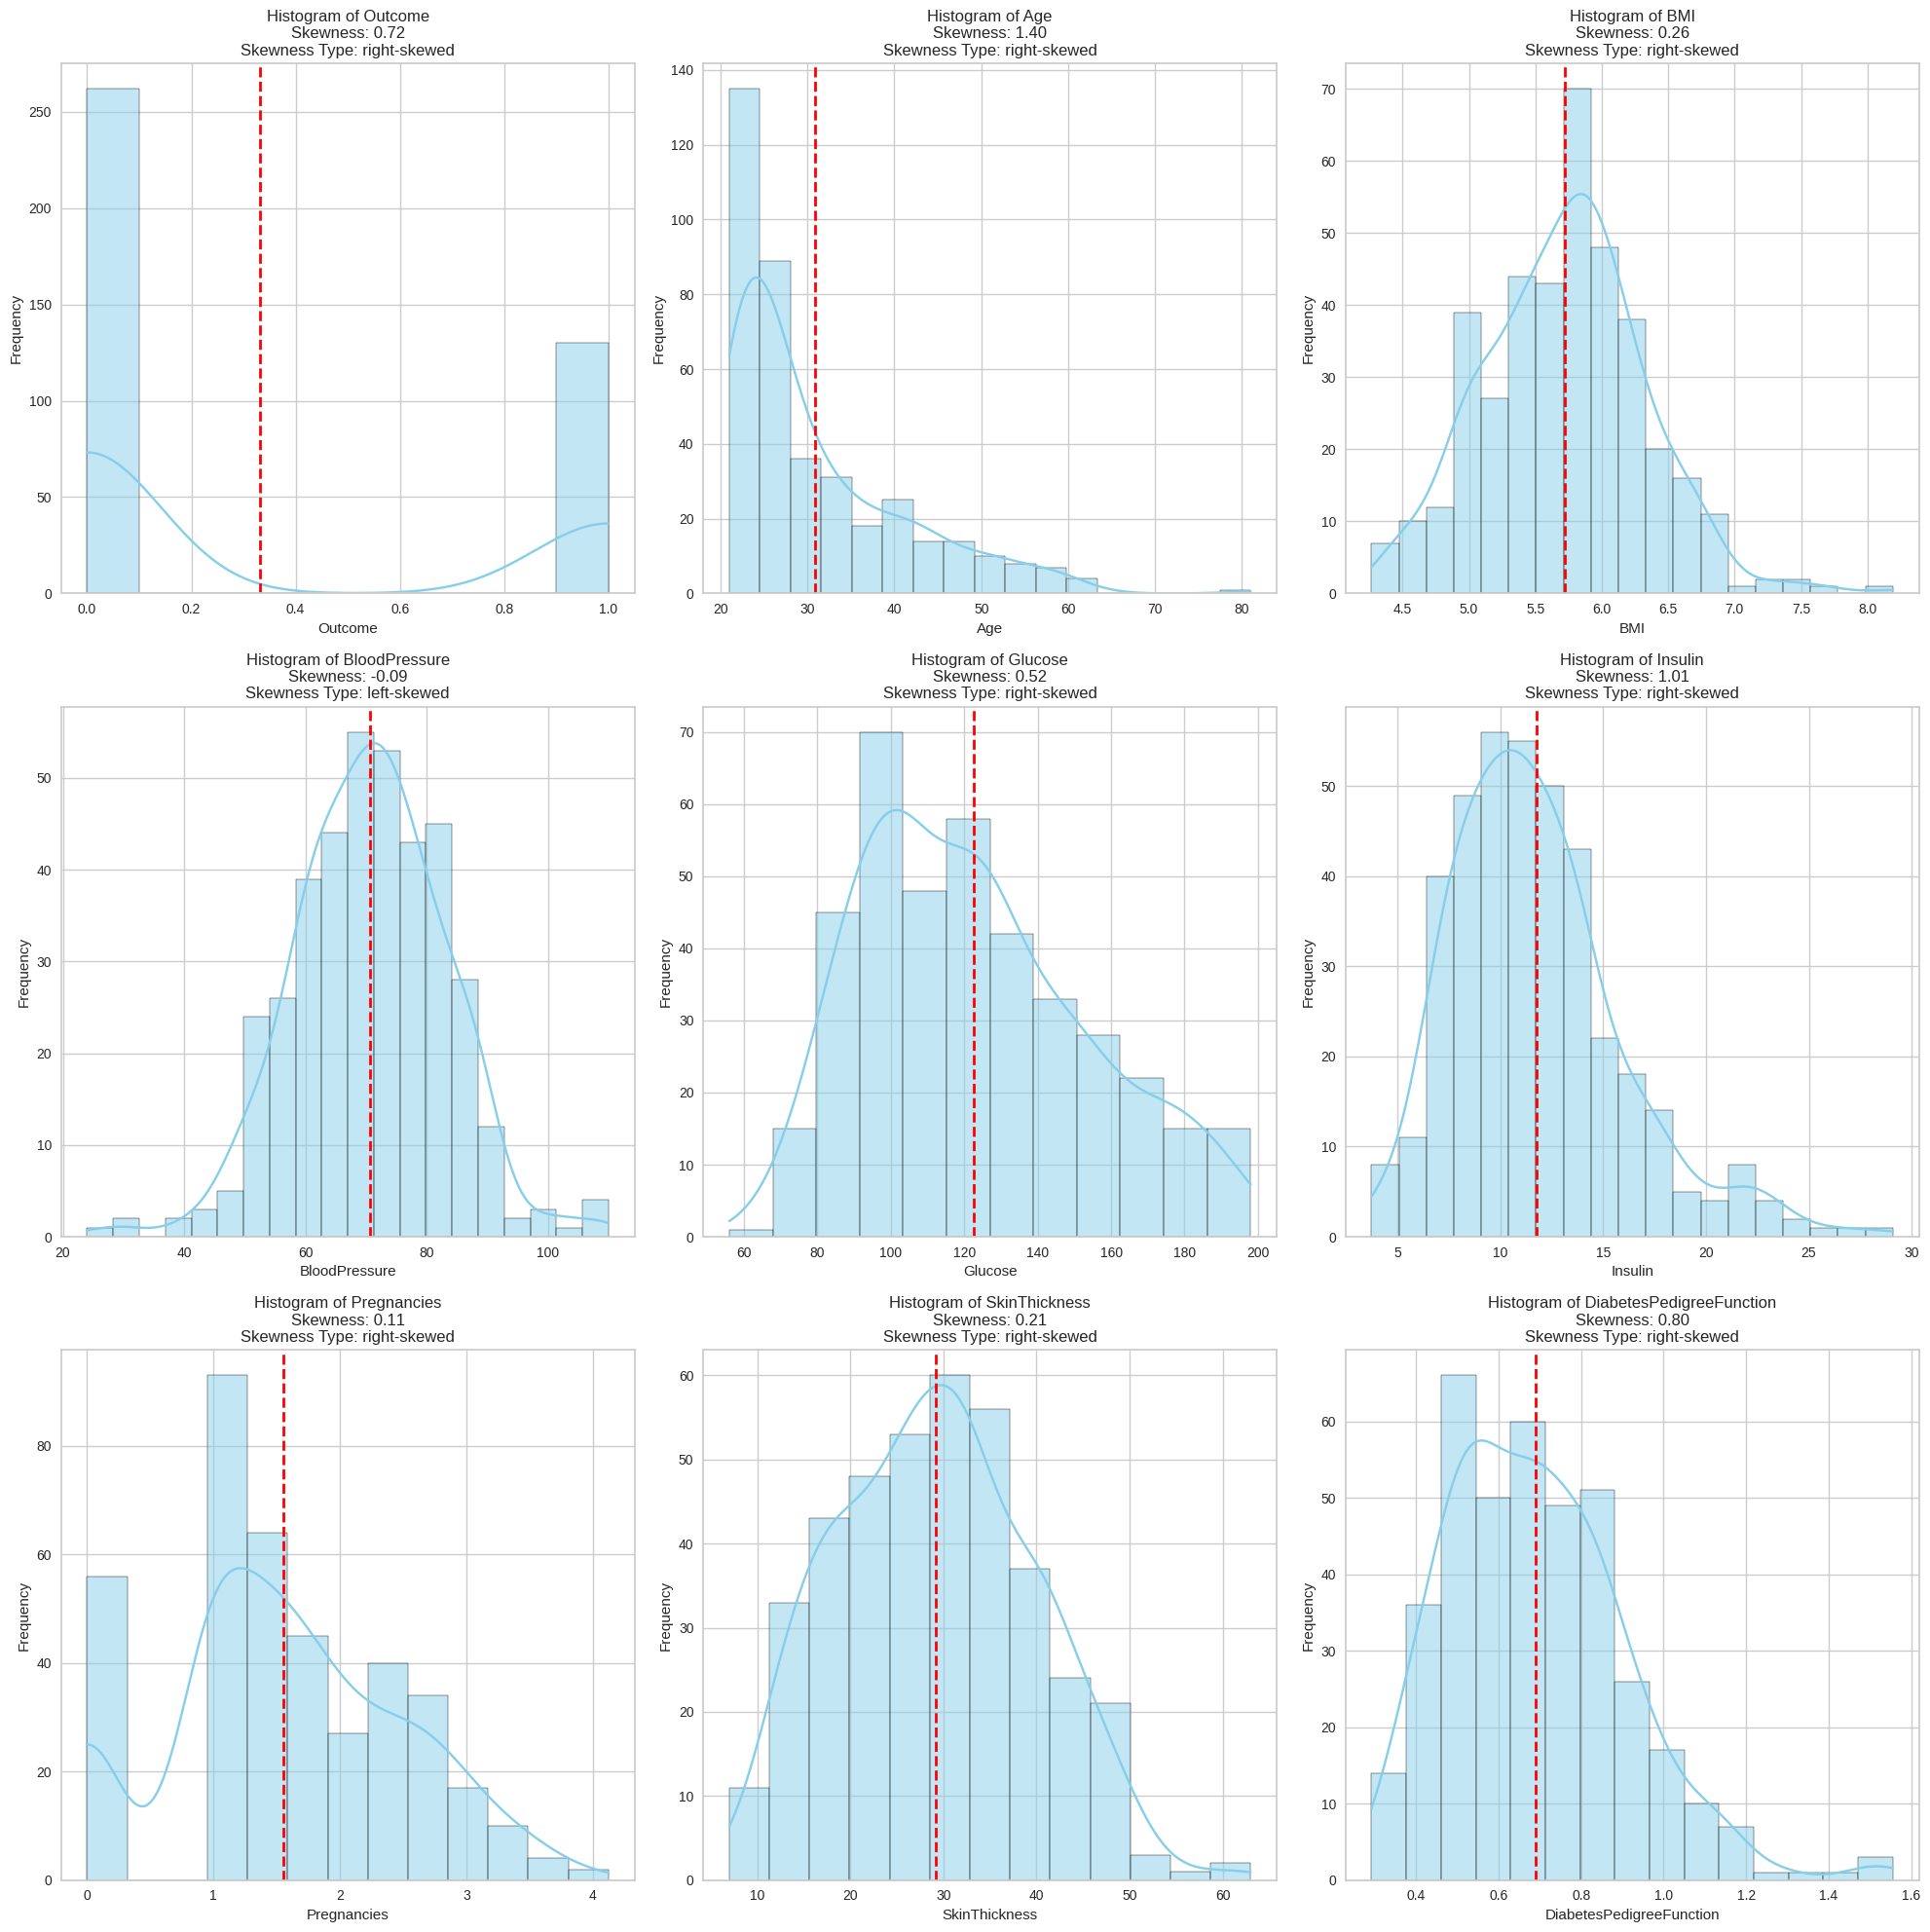

In [ ]:
# Plotting histogram to see the effect of square root transformation
n_cols = 3
n_rows = int(np.ceil(len(diabetes.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.ravel()

for i, col in enumerate(diabetes.columns):
    col_skewness = stats.skew(diabetes[col])

    if col_skewness > 0:
        skewness_type = 'right-skewed'
    elif col_skewness < 0:
        skewness_type = 'left-skewed'
    else:
        skewness_type = 'approximately symmetric'

    sns.histplot(diabetes[col], kde=True, color='skyblue', ax=axes[i])
    axes[i].axvline(diabetes[col].mean(), color='red', linestyle='dashed', linewidth=2)

    axes[i].set_title("Histogram of {}\nSkewness: {:.2f}\nSkewness Type: {}".format(col, col_skewness, skewness_type))
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(len(diabetes.columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

##Data Modeling

In [ ]:
#Splitting the dataframe into X ( consisting of features) and Y (consisting of the target variable)
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes[feature_names]
y = diabetes.Outcome

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Use scikit learn to split train test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

#  Perform decision tree classification
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, min_samples_split=10,
                            min_samples_leaf=2, min_weight_fraction_leaf=0.01, max_features=0.8,
                            random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0,
                            class_weight='balanced', ccp_alpha=0.01)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Export decision tree as dot file
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['Non-diabetic', 'Diabetic'], rounded=True, filled=True)
graph = graphviz.Source(dot_data)

# Save decision tree as PNG image
graph.format = 'png'
graph.render('decision_tree')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'decision_tree.png'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

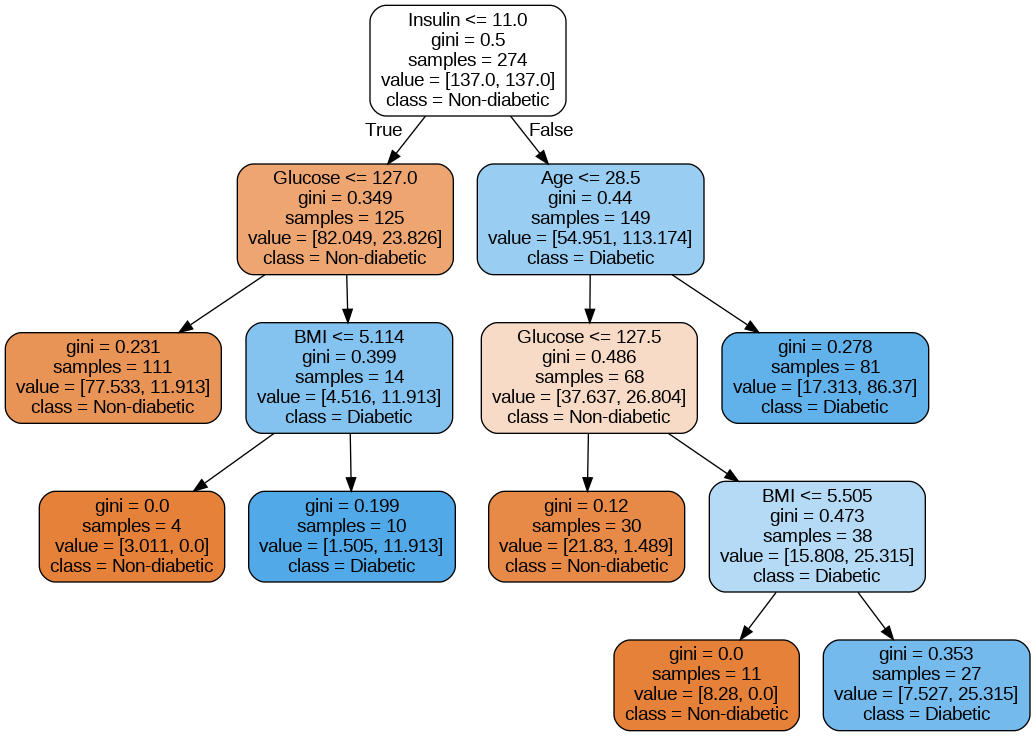

In [ ]:
# Open the saved image using PIL
image = Image.open('decision_tree.png')

# Display the image in a new window
image.show()

###The first split is based on the feature Insulin, where the node splits into two branches. If Insulin is less than or equal to 11.0, the patient is classified as non-diabetic, otherwise, the tree moves to the right branch.

##Left Branch:

###1. The second split is based on the feature Glucose, where the node splits into two branches. If Glucose is less than or equal to 127.0, the patient is classified as non-diabetic, otherwise, the tree moves to the right branch.

###2. The third split is based on the feature BMI, where if BMI is less than or equal to 5.114, the patient is classified as diabetic, otherwise, the patient is classified as non-diabetic.

##Right Branch:

###1. In the right branch, there is split based on the feature Age, where if Age is less than or equal to 28.5, the patient is classified as diabetic, otherwise, the tree moves to the right branch.

###2. The third split is based on the feature Glucose, where if Glucose is less than or equal to 127.5, the patient is classified as non-diabetic, otherwise, the the tree moves to the left branch

###3. The fourth split is based on the feature BMI, where if BMI is less than or equal to 5.505, the patient is classified as non-diabetic, otherwise, the patient is classified as diabetic.



In [ ]:
#Compute the accuracy of the decision tree model
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 76.27%


In [ ]:
#generate another model using different parameters
from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=6
                              , min_samples_split=2,
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                            random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0,
                            class_weight=None, ccp_alpha=0.0)


clf2.fit(X_train, y_train)


y_pred2 = clf2.predict(X_test)


accuracy2 = accuracy_score(y_test, y_pred2)


print("Accuracy of the second model: {:.2f}%".format(accuracy2 * 100))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy of the second model: 79.66%


In [ ]:
data = export_graphviz(clf2, out_file=None, feature_names=X.columns, class_names=['Non-diabetic', 'Diabetic'], rounded=True, filled=True)
graph = graphviz.Source(data)


graph.format = 'png'
graph.render('decision2_tree')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'decision2_tree.png'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

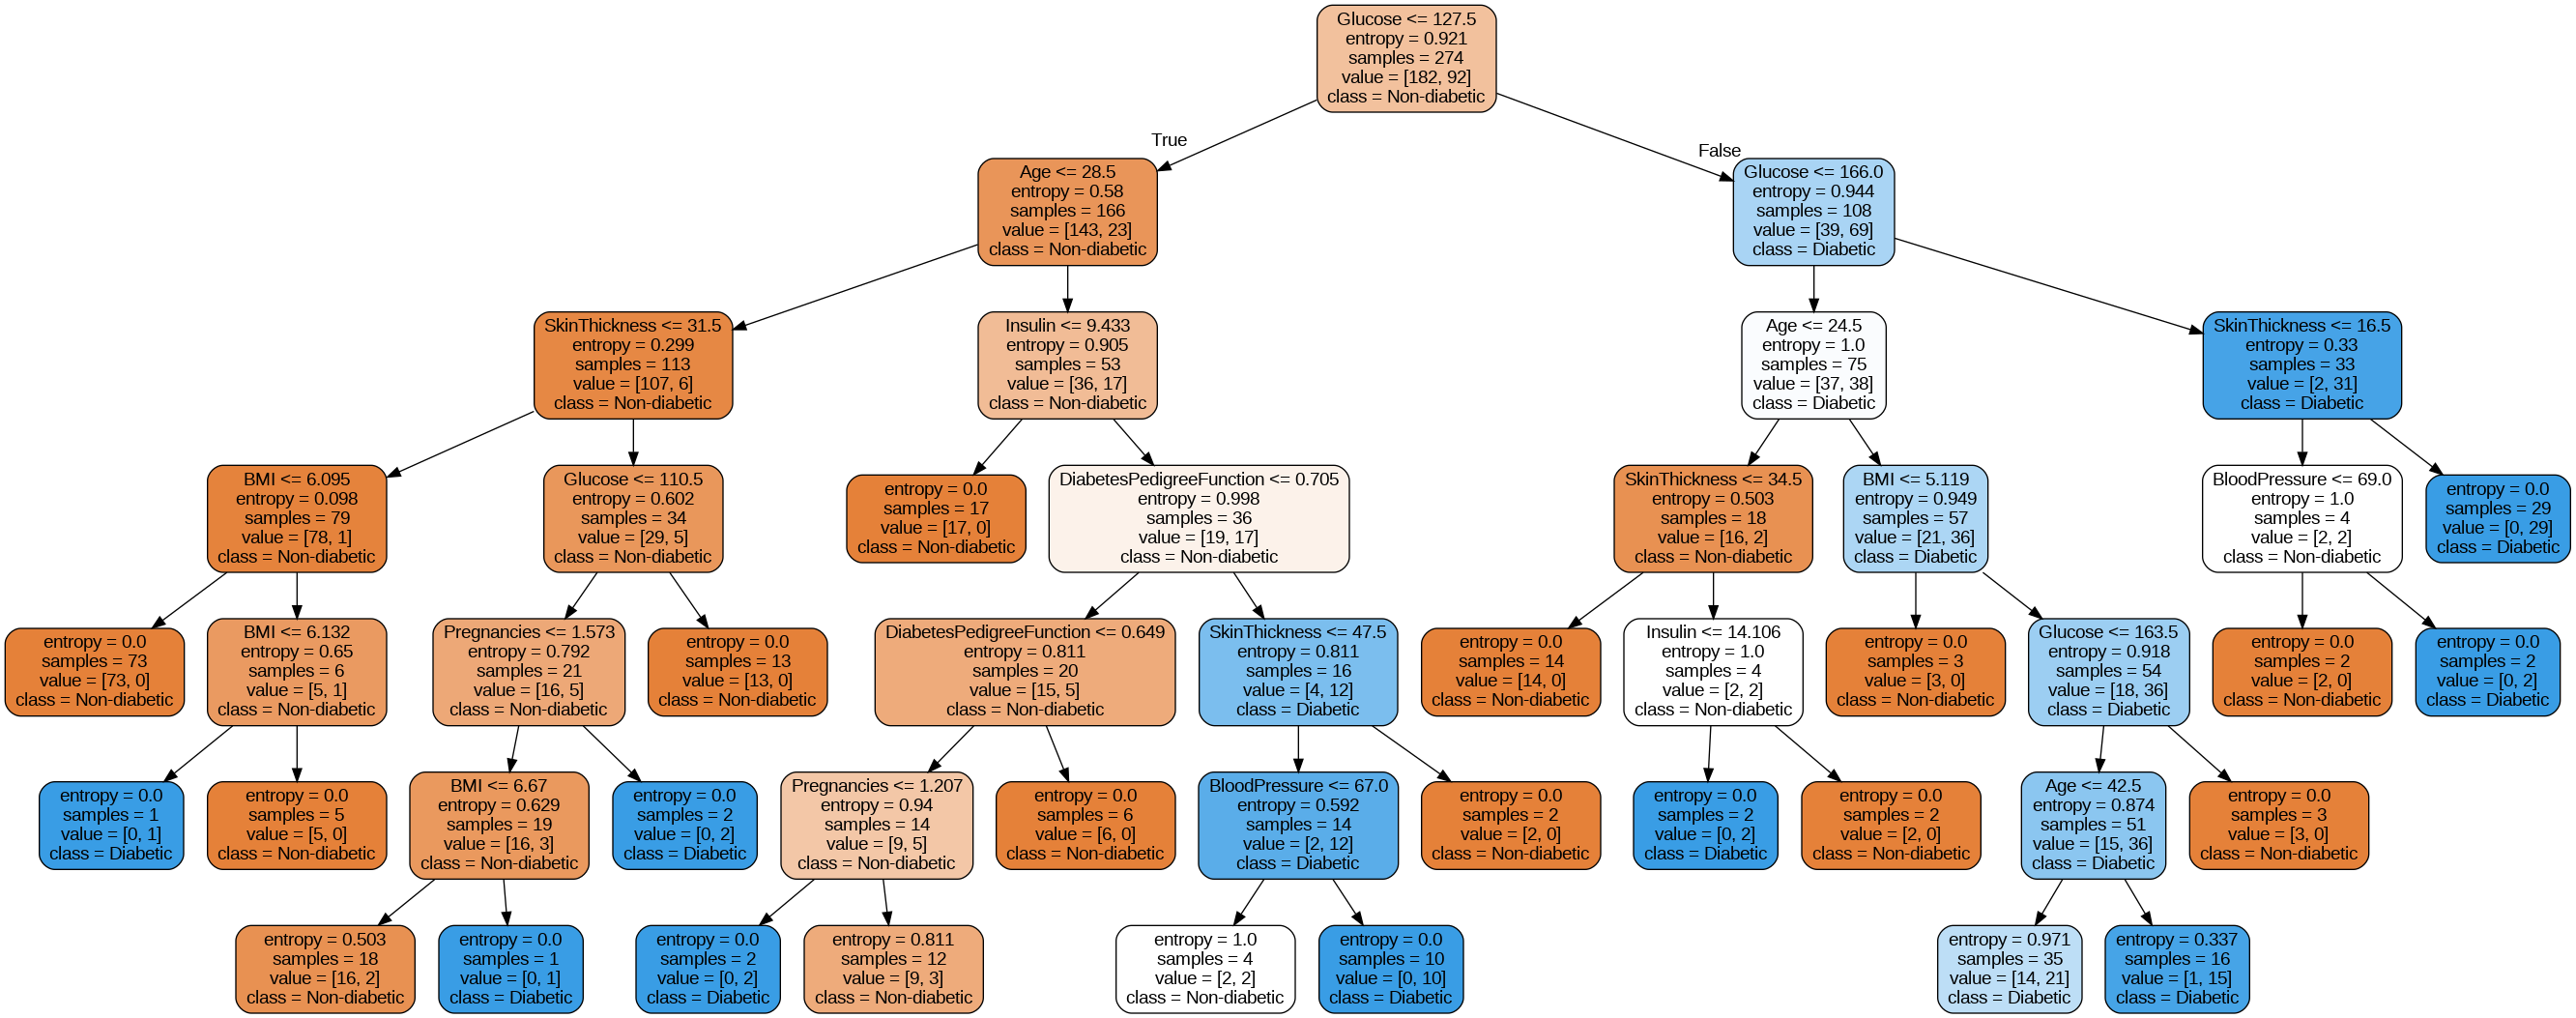

In [ ]:
from PIL import Image


image = Image.open('decision2_tree.png')

image.show()

###The first split is based on the feature Glucose, where the node splits into two branches. If Glucise is less than or equal to 127.5, the patient is classified as non-diabetic, otherwise, the tree moves to the right branch.

##Left Branch:

### 1. The second split is based on the feature Age, where the node splits into two branches. If Age is less than or equal to 28.5, the patient is classified as non-diabetic, otherwise, the tree moves to the right branch.

### 2. At the third level, there are two splits. The Left split is based on the feature SkinThickness, where if SkinThickness is less than or equal to 31.5, the tree moves to the left branch, otherwise, the tree moves to the right branch.

###3. The right split is based on the feature Insulin, where if Insulin is less than or equal to 9.433, the tree moves to the left branch, otherwise, the tree moves to the right branch.

### 4. Similary, this will recursively split the data based on the input features that can best separate the target classes (diabetic vs. non-diabetic) until a stopping criterion is met.


##Right Branch:



###1. The right split is based on the feature Glucose, where if Glucose is less than or equal to 166.0, the tree moves to right branch, otherwise, the the tree moves to the left branch

### 2. The right split is based on the feature SkinThickness, where if SkinThickness is less than or equal to 16.5, the tree moves to the left branch, otherwise, the person in diabetic.

### 3. The left split is based on the feature Age, where if Age is less than or equal to 24.5 the tree moves to the left branch, otherwise, the tree moves to the right branch.

### 4. Similary, this will recursively split the data based on the input features that can best separate the target classes (diabetic vs. non-diabetic) until a stopping criterion is met.




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

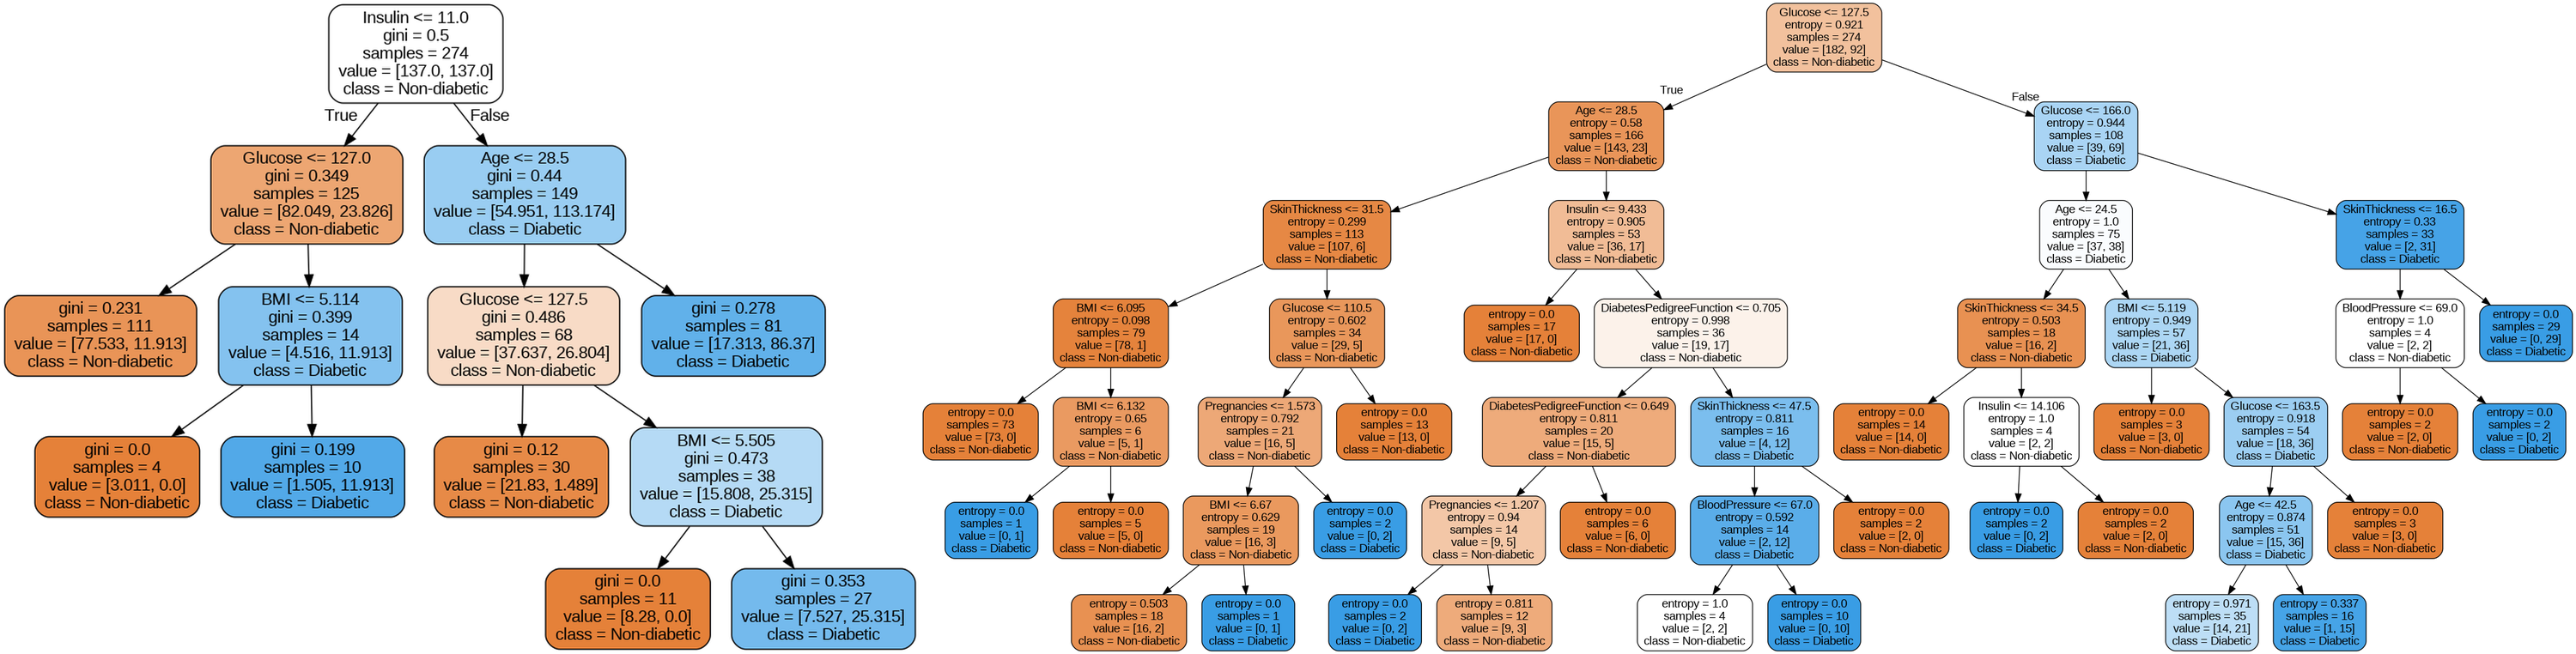

In [ ]:
# displaying decision tree structure side by side
from PIL import Image
from PIL.ImageDraw import Draw

image1 = Image.open('decision_tree.png')

image2 = Image.open('decision2_tree.png')

max_height = max(image1.size[1], image2.size[1])
image1 = image1.resize((int(image1.size[0] * max_height / image1.size[1]), max_height), Image.ANTIALIAS)
image2 = image2.resize((int(image2.size[0] * max_height / image2.size[1]), max_height), Image.ANTIALIAS)

result_width = image1.size[0] + image2.size[0]
result_height = max_height

result = Image.new('RGB', (result_width, result_height), color='white')

result.paste(image1, (0, 0))
result.paste(image2, (image1.size[0], 0))

figure_width = 3000
figure_height = int(figure_width * result_height / result_width)
result = result.resize((figure_width, figure_height), Image.ANTIALIAS)

result.show()


##Comparision of the two Decision Classifier trees:

###1. Max-dept : The max dept is 5 in the first tree and 6 in the second tree.
###2. Starting feature: In the first tree, the first split is based on the feature Insulin, where the node splits into two branches. In the second tree,the first split is based on the feature Glucose rather, where the node splits into two branches.

## Data Validation

##Comparision of accuracy:



In [ ]:
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy of the first model: {:.2f}%".format(accuracy1 * 100))

accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy of the second model: {:.2f}%".format(accuracy2 * 100))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy of the first model: 76.27%
Accuracy of the second model: 79.66%


### We can observe that the accuracy of 2nd decision tree model is superior to that of 1st decision tree model.

In [ ]:
# classification report of First tree
report_clf = classification_report(y_test, y_pred)
print("Classification Report for first Decision Tree model:")
print(report_clf)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Classification Report for first Decision Tree model:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        80
           1       0.60      0.79      0.68        38

    accuracy                           0.76       118
   macro avg       0.74      0.77      0.75       118
weighted avg       0.79      0.76      0.77       118



In [ ]:
## classification of second tree
report_clf = classification_report(y_test, y_pred2)
print("Classification Report for second Decision Tree model:")
print(report_clf)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Classification Report for second Decision Tree model:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85        80
           1       0.67      0.74      0.70        38

    accuracy                           0.80       118
   macro avg       0.77      0.78      0.77       118
weighted avg       0.80      0.80      0.80       118

